# **Методы машинного обучения. Лабораторная работа №2**
# Изучение библиотек обработки данных.

**Цель лабораторной работы**: изучение библиотек обработки данных Pandas и PandaSQL.

**Задание**

**Часть 1.**
Выполните первое демонстрационное задание "demo assignment" под названием "Exploratory data analysis with Pandas" со страницы курса https://mlcourse.ai/assignments

**Часть 2.**
Выполните следующие запросы с использованием двух различных библиотек - Pandas и PandaSQL.
* один произвольный запрос на соединение двух наборов данных
* один произвольный запрос на группировку набора данных с использованием функций агрегирования
Сравните время выполнения каждого запроса в Pandas и PandaSQL.

**Выполнение работы**

**Часть 1**


> *Примечание: из-за того, что условия задания на английском языке, то и последующее выполнение оформлено на языке источника, ввиду возможных различий при переводе.* 



In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [0]:
import plotly.express as pl
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [0]:
import statistics
import math

In [0]:
data = pd.read_csv('/content/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
for colName in data.columns:
  print(colName)

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
salary


**1. How many men and women (sex feature) are represented in this dataset?**

In [0]:
sexStat = data['sex'].value_counts()
print(sexStat)

Male      21790
Female    10771
Name: sex, dtype: int64


**2. What is the average age (age feature) of women?**

In [0]:
womenData = data[data['sex'] == 'Female']
averageWomanAge = np.mean(womenData['age'])
print('Average woman age is ', averageWomanAge,'or rounded up', math.ceil(averageWomanAge)) 

Average woman age is  36.85823043357163 or rounded up 37


**3. What is the percentage of German citizens (native-country feature)?**

In [0]:
germanCitizensProportion = len(data[data['native-country']== 'Germany']) / len(data['native-country'])
print('German citizens proportion is ', round( germanCitizensProportion * 100 , 2), '%')

German citizens proportion is  0.42 %


**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?**

In [0]:
salaryLess50K = data[data['salary']== '<=50K']
salaryMore50K = data[data['salary']== '>50K']

In [0]:
print('People who has salary more than 50K per year:')
print('Mean age: ', statistics.mean(salaryMore50K['age']))
print('Standard deviation of age: ', statistics.stdev(salaryMore50K['age']))
print('People who has salary less than 50K per year:')
print('Mean age: ', statistics.mean(salaryLess50K['age']))
print('Standard deviation of age: ', statistics.stdev(salaryLess50K['age']))

People who has salary more than 50K per year:
Mean age:  44.24984058155847
Standard deviation of age:  10.519027719851826
People who has salary less than 50K per year:
Mean age:  36.78373786407767
Standard deviation of age:  14.02008849082488


**6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)**

Возможно, в задании ошибка, так как, я подозреваю, что тип образования HS-grad можно также отнести к high school education

*   **Без включения HS-grad**



In [0]:
PieInfo = pd.DataFrame(data = salaryMore50K['education'].value_counts())
PieInfo

,education
Bachelors,2221
HS-grad,1675
Some-college,1387
Masters,959
Prof-school,423
Assoc-voc,361
Doctorate,306
Assoc-acdm,265
10th,62
11th,60


In [0]:
def createHSProportion( HSgrades, PieInfo ):
  highEducationCounter = 0
  midleEducationCounter = 0
  for key in list(PieInfo.index.values):
    if(key in HSgrades):
      highEducationCounter += PieInfo['education'][key]
    else:
      midleEducationCounter += PieInfo['education'][key]
  aggregatedPieInfo = pd.DataFrame(data=[highEducationCounter, midleEducationCounter], columns=['count'], index=['High school education','Middle school education'])
  fig = pl.pie(aggregatedPieInfo, names=list(aggregatedPieInfo.index.values), values='count')
  fig.show()

Have created function that helps make pie chart with proportions of high school education

In [0]:
createHSProportion(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'], PieInfo)

**Answer**: Actually, this is false. Not all people who earn more than 50K has a high school education and we can see that the about 57.8% of people has high education

*   **Включая HS-grad**

In [0]:
createHSProportion(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate', 'HS-grad'], PieInfo)

**Answer**: Actually, this is true. Not all but a lot of people (about 79.2%) with great salary has a high school education 

In [0]:
pl.pie(forPieInfo, names=list(forPieInfo.index.values), values='education')

Let's have a look how educated people with big salary. One of the biggest part from all has a Small-college grade (about 17.7%). Other the biggest parts (greater then 10%) of chart indicate that the people has a high school education

**7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.**



*   Female



In [0]:
data[data['sex'] == 'Female'].groupby(['race'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,119.0,37.117647,13.114991,17.0,27.0,36.0,46.00,80.0
Asian-Pac-Islander,346.0,35.089595,12.300845,17.0,25.0,33.0,43.75,75.0
Black,1555.0,37.854019,12.637197,17.0,28.0,37.0,46.00,90.0
Other,109.0,31.678899,11.631599,17.0,23.0,29.0,39.00,74.0
White,8642.0,36.811618,14.329093,17.0,25.0,35.0,46.00,90.0


*   Male


In [0]:
maleDescribeData = data[data['sex'] == 'Male'].groupby(['race'])['age'].describe()
maleDescribeData

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,192.0,37.208333,12.049563,17.0,28.0,35.0,45.0,82.0
Asian-Pac-Islander,693.0,39.073593,12.883944,18.0,29.0,37.0,46.0,90.0
Black,1569.0,37.682600,12.882612,17.0,27.0,36.0,46.0,90.0
Other,162.0,34.654321,11.355531,17.0,26.0,32.0,42.0,77.0
White,19174.0,39.652498,13.436029,17.0,29.0,38.0,49.0,90.0



*    Maximum age of men of Amer-Indian-Eskimo race


In [0]:
maleDescribeData['max']['Amer-Indian-Eskimo']

82.0

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [0]:
PieInfo = pd.DataFrame(data = salaryMore50K['marital-status'].value_counts())
PieInfo

,marital-status
Married-civ-spouse,6692
Never-married,491
Divorced,463
Widowed,85
Separated,66
Married-spouse-absent,34
Married-AF-spouse,10


In [0]:
marriedStatus = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']

MarriedCounter = 0
NotMarriedCounter = 0

for key in list(PieInfo.index.values):
  if(key in marriedStatus):
    MarriedCounter += PieInfo['marital-status'][key]
  else:
    NotMarriedCounter += PieInfo['marital-status'][key]

aggregatedPieInfo = pd.DataFrame(data=[MarriedCounter, NotMarriedCounter], columns=['count'], index=['Married','Not Married'])

pl.pie(aggregatedPieInfo, names=list(aggregatedPieInfo.index.values), values='count')

The biggest part of people with great salary are married (85.9%)

**9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**



*   Maximum number of hours a person works per week



In [0]:
hoursPerWeekData = pd.DataFrame(data = data['hours-per-week'].value_counts())
maxHoursPerWeek = max(hoursPerWeekData['hours-per-week'].index.values)
maxHoursPerWeek

99



*   Amount of people who works 99 hours per week




In [0]:
totalCountOfHardWorkers = hoursPerWeekData['hours-per-week'][maxHoursPerWeek]
totalCountOfHardWorkers

85



*   Proportion of hardworkers with big salary




In [0]:
hardworkersFrame = pd.DataFrame(data=data[data['hours-per-week']== maxHoursPerWeek])
bigSalaryHardWorkersProportion = (hardworkersFrame['salary'].value_counts()['>50K'] / len(hardworkersFrame) )*100
print(round(bigSalaryHardWorkersProportion, 2), '%')

29.41 %


**10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?**



*   Preparing data about people with the less salary




In [0]:
lessSalaryData = salaryLess50K.groupby(['native-country'])['hours-per-week'].describe()['mean']
lessSalaryData = lessSalaryData.drop(lessSalaryData.index[0])
lessSalaryData = lessSalaryData.rename("<=50K")
len(lessSalaryData)

41



*   Preparing data about people with the bigger salary




In [0]:
biggerSalaryData = salaryMore50K.groupby(['native-country'])['hours-per-week'].describe()['mean']
biggerSalaryData = biggerSalaryData.drop(biggerSalaryData.index[0])
biggerSalaryData = biggerSalaryData.rename(">50K")
len(biggerSalaryData)

39


*   Creating bar chart


In [0]:
dataForChart = pd.DataFrame(data=pd.concat([biggerSalaryData,lessSalaryData], ignore_index=False, axis=1))
fig = go.Figure(data=[
    go.Bar(name='Bigger salary', x=dataForChart.index.values, y=dataForChart['>50K']),
    go.Bar(name='Less salary',  x=dataForChart.index.values, y=dataForChart['<=50K'])
])

fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Mean age",
    barmode='group')
fig.show()


*   Information about Japan:


> Average age of people with salary greater then 50K





In [0]:
dataForChart['>50K']['Japan']

47.958333333333336



> Average age of people with salary less then 50K



In [0]:
dataForChart['<=50K']['Japan']

41.0

**Часть 2**

In [60]:
user_usage = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ММО/2/user_usage.csv')
user_device = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ММО/2/user_device.csv')
android_devices = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ММО/2/android_devices.csv')
print('user_usage\n',user_usage.head(2), '\n shape:', user_usage.shape)
print('\nuser_device\n',user_device.head(2), '\n shape:', user_device.shape)
print('\nandroid_devices\n', android_devices.head(2), '\n shape:', android_devices.shape )


user_usage
    outgoing_mins_per_month  outgoing_sms_per_month  monthly_mb  use_id
0                    21.97                    4.82     1557.33   22787
1                  1710.08                  136.88     7267.55   22788 
 shape: (240, 4)

user_device
    use_id  user_id platform  platform_version     device  use_type_id
0   22782    26980      ios              10.2  iPhone7,2            2
1   22783    29628  android               6.0    Nexus 5            3 
 shape: (272, 6)

android_devices
   Retail Branding Marketing Name  Device                      Model
0             NaN            NaN  AD681H  Smartfren Andromax AD681H
1             NaN            NaN   FJL21                      FJL21 
 shape: (14546, 4)


Соединение наборов данных с помощью Pandas

In [36]:
def pandas_merge(user_usage, user_device):
  return  pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id')
%time
result =pandas_merge(user_usage, user_device)
result.head()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


Соединение наборов данных с помощью PandaSQL

In [17]:
import pandasql as ps
def pandasql_merge(user_usage, user_device):
    aggr_query = '''
        SELECT user_usage.outgoing_mins_per_month	,
        user_usage.outgoing_sms_per_month, user_usage.monthly_mb,
        user_device.use_id, user_device.platform, user_device.device
        FROM user_usage,  user_device
        WHERE user_usage.use_id = user_device.use_id
        '''
    return ps.sqldf(aggr_query, locals())
%time
pandasql_merge(user_usage, user_device).head()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


Группировка набора данных с использованием функций агрегирования

Pandas:


In [37]:
def pandas_agg(result):
  return result.groupby('device')['monthly_mb'].mean()

%time
res1 = pandas_agg(result)
res1.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


device
A0001    15573.33
C6603     1557.33
D2303      519.12
D5503     1557.33
D5803     1557.33
Name: monthly_mb, dtype: float64

PandaSQL:

In [29]:
def pandasql_agg(result):
    aggr_query = '''
        SELECT 
            avg(monthly_mb) as avg_traffic, device
        FROM result 
        GROUP BY device
        '''
    return ps.sqldf(aggr_query, locals())

%time
pandasql_agg(result).head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


,avg_traffic,device
0,15573.33,A0001
1,1557.33,C6603
2,519.12,D2303
3,1557.33,D5503
4,1557.33,D5803


Сравнение времени выполнения. 

In [0]:
import time
#  Метод подсчета времени
def count_mean_time(func, params, N =50):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

In [0]:
ex1_times = []
for count in range(1, 100):
    pandasql_time = count_mean_time(pandasql_merge, [user_usage, user_device])
    pandas_time = count_mean_time(pandas_merge, [user_usage, user_device])
    ex1_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

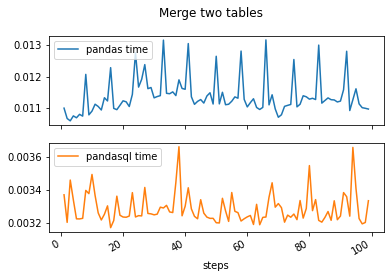

In [57]:
ex1_times_df = pd.DataFrame(ex1_times)
ex1_times_df.columns = ['steps', 'pandas time', 'pandasql time']
ex1_times_df = ex1_times_df.set_index('steps')

ax = ex1_times_df.plot(title = 'Merge two tables', subplots = True)

Сравнение времени выполнения объединения таблиц показало, что pandasql справляется с этой задачей быстрее, чем pandas. 

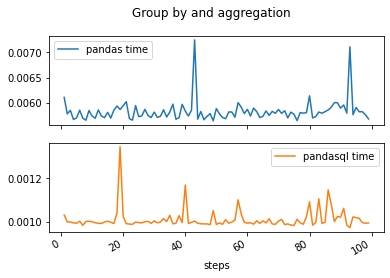

In [58]:
ex2_times = []
for count in range(1, 100):
    pandasql_time = count_mean_time(pandasql_agg, [result])
    pandas_time = count_mean_time(pandas_agg, [result])
    ex2_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

ex2_times_df = pd.DataFrame(ex2_times)
ex2_times_df.columns = ['steps', 'pandas time', 'pandasql time']
ex2_times_df = ex2_times_df.set_index('steps')

ax = ex2_times_df.plot(title = 'Group by and aggregation', subplots = True)

**Вывод**: Возможно, ввиду небольшого объема данных, pandasql показал лучшее время выполнения, как запроса объединения двух таблиц, так и выполнения группировки с агрегатом.  